In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins_raw

In [4]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
penguins = load_penguins_raw()

In [5]:
penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [6]:
penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [7]:
penguins = penguins[[
      #'studyName', 'Sample Number',
      'Species', #'Region',
      'Island', #'Stage',
      #'Individual ID'
      'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
      'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex'
      #'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'
      ]].copy()

penguins.columns

Index(['Species', 'Island', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [8]:
penguins.isna().sum()

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
dtype: int64

In [9]:
penguins.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'], inplace=True)
penguins.isna().sum()

Species                0
Island                 0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    9
dtype: int64

In [10]:
penguins.loc[penguins.duplicated()]

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex


In [11]:
print(penguins)

                                       Species     Island Clutch Completion  \
0          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
1          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
2          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
4          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
5          Adelie Penguin (Pygoscelis adeliae)  Torgersen               Yes   
..                                         ...        ...               ...   
339  Chinstrap penguin (Pygoscelis antarctica)      Dream               Yes   
340  Chinstrap penguin (Pygoscelis antarctica)      Dream                No   
341  Chinstrap penguin (Pygoscelis antarctica)      Dream                No   
342  Chinstrap penguin (Pygoscelis antarctica)      Dream               Yes   
343  Chinstrap penguin (Pygoscelis antarctica)      Dream               Yes   

       Date Egg  Culmen Length (mm)  Culmen Depth (

/home/jakubbaransky/miniconda3/envs/Archiv/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


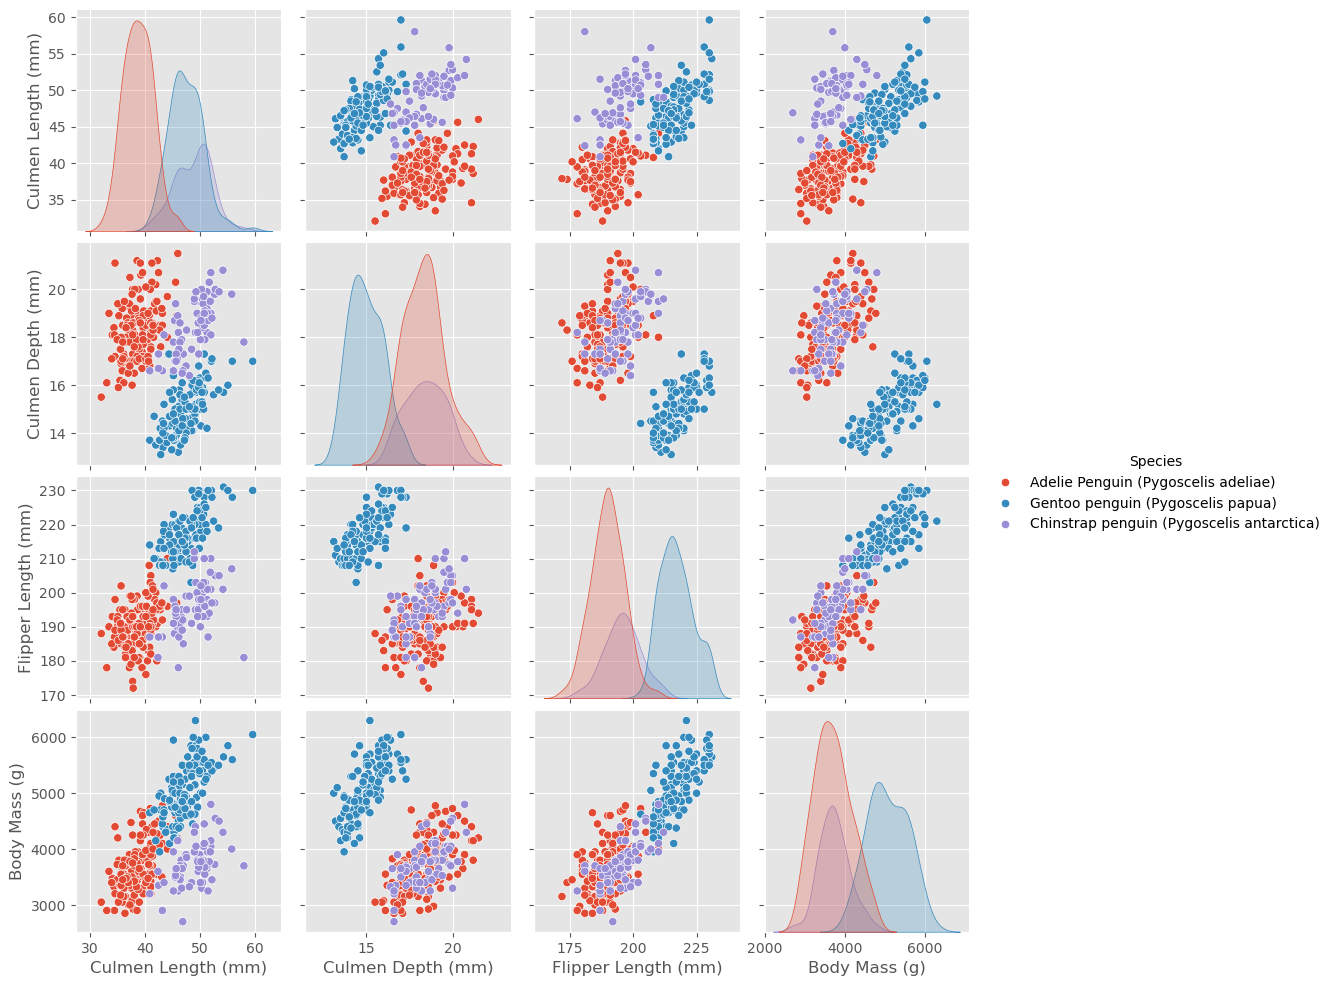

In [12]:
sns.pairplot(penguins, hue='Species')
plt.show()

<Axes: xlabel='Culmen Length (mm)', ylabel='Body Mass (g)'>

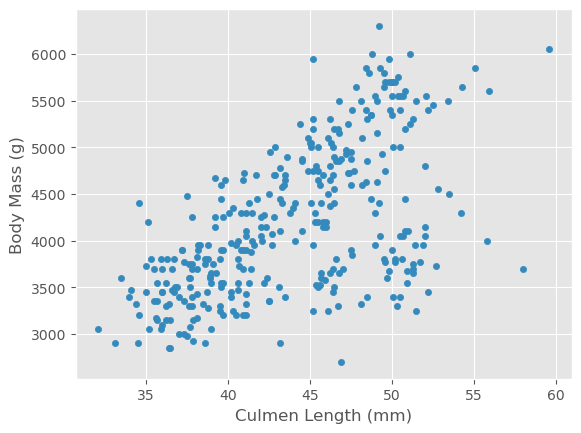

In [13]:
penguins.plot(kind='scatter', x='Culmen Length (mm)', y='Body Mass (g)')

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

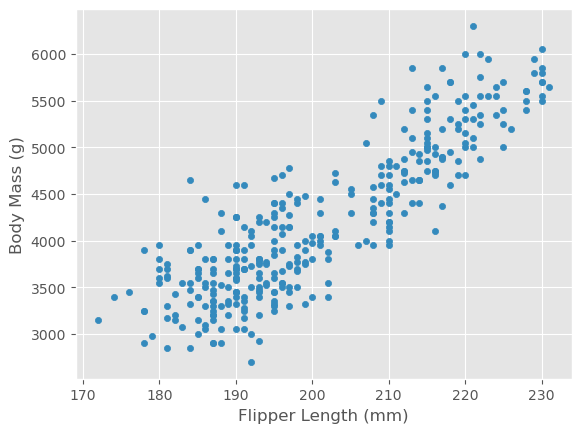

In [14]:
penguins.plot(kind='scatter', x='Flipper Length (mm)', y='Body Mass (g)')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

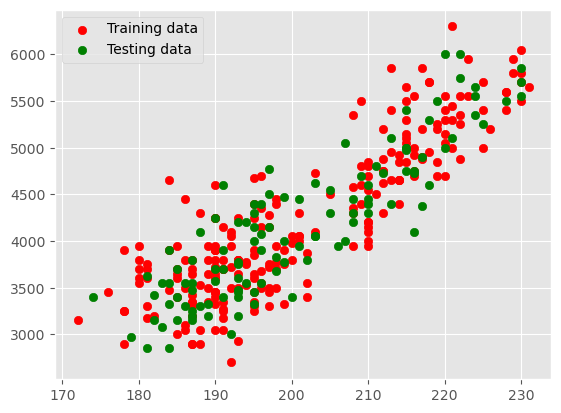

In [17]:
X = penguins[['Flipper Length (mm)']]
y = penguins['Body Mass (g)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X_train, y_train, label='Training data', color='r')
plt.scatter(X_test, y_test, label='Testing data', color='g')
plt.legend()
plt.show()

In [18]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

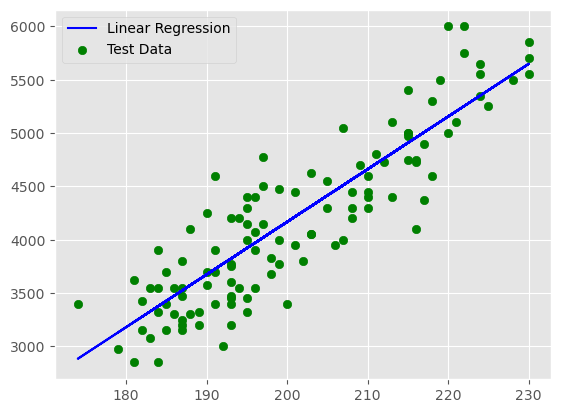

In [19]:
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Test Data', color='g')
plt.legend()
plt.show()

In [20]:
LR.predict(np.array([[220]]))[0]

5155.775643916274

In [21]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.7828683958833074